# Prompting with Dall.E 2 API

Direct interface usage
https://labs.openai.com/

Link to hand book:
https://dallery.gallery/wp-content/uploads/2022/07/The-DALL%C2%B7E-2-prompt-book-v1.02.pdf

In this section we will talk about how to directly use OpenAI API to generate and download Dall.E Image

In [24]:
import openai
openai.api_key = <your key>

In [63]:
import json
import os
from pathlib import Path
from base64 import b64decode
import openai

PROMPT = "I am sitting in a room"
IMAGE_DIR = Path.cwd() / "Dalle_images"
IMAGE_DIR.mkdir(parents=True, exist_ok=True)

response = openai.Image.create(
    prompt=PROMPT,
    n=1,
    size="256x256",
    response_format="b64_json",
)

# decode the b64 data
image_data = b64decode(response["data"][0]["b64_json"])

# setting up file name
fileName =  str(PROMPT)+".png"
image_file = IMAGE_DIR / fileName

with open(image_file, mode="wb") as png:
    png.write(image_data)

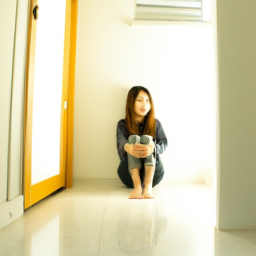

In [65]:
from PIL import Image

#read the image
im = Image.open(image_file)

#show image
display(im)

# Generate Variables

now we could use the built-in function to generate variable of the image

In [67]:
response = openai.Image.create_variation(
  image=open(image_file, "rb"),
  n=1,
  size="256x256",
  response_format="b64_json",
)

# decode the b64 data
image_data = b64decode(response["data"][0]["b64_json"])

# setting up file name
fileName =  "variations_"+str(PROMPT)+".png"
image_file = IMAGE_DIR / fileName

with open(image_file, mode="wb") as png:
    png.write(image_data)